### The exercise contains data of the obesity of patients in a hospital
The first file consists obesity count of males and females of patients during different years

The second file consists of age breakage of obesity count

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)


Populating the interactive namespace from numpy and matplotlib


### Read .xls file through Excelfiles

In [2]:
x1=pd.ExcelFile("obes-phys-acti-diet.xls")

In [3]:
print(x1)

### Print sheet names present in the xls file¶

In [4]:
x1.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

### create a list of six columns

1. Year
2. Total
3. Males
4. Females
5. Nan
6. None

In [5]:
# Define the columns to be read

In [6]:
columns_read=['Year','Total','Males','Females','Nan','None']

### parse the data and read the six columns present in 7.1 sheet of data and skip first six rows and set skipfooter=14 and the column names as the list defined above

In [7]:
data_gender = x1.parse(u'7.1', skiprows=6, skip_footer=14,names=columns_read)
data_gender.head()
#df.columns=columns_read
#df.head()

,Year,Total,Males,Females,Nan,None
0,2001/02,1019,284.0,731.0,NaN,NaN
1,2002/03,1275,427.0,848.0,NaN,NaN
2,2003/04,1711,498.0,1213.0,NaN,NaN
3,2004/05,2035,589.0,1442.0,NaN,NaN
4,2005/06,2564,746.0,1786.0,NaN,NaN


### Drop two columns Nan and None

In [8]:
data_gender=data_gender.drop(['Nan','None'],axis=1)

### Print data

In [9]:
print(data_gender.head(16))
data_gender.columns

                                                 Year  Total   Males  Females
0                                             2001/02   1019   284.0    731.0
1                                             2002/03   1275   427.0    848.0
2                                             2003/04   1711   498.0   1213.0
3                                             2004/05   2035   589.0   1442.0
4                                             2005/06   2564   746.0   1786.0
5                                             2006/07   3862  1047.0   2807.0
6                                             2007/08   5018  1405.0   3613.0
7                                             2008/09   7988  2077.0   5910.0
8                                             2009/10  10571  2495.0   8074.0
9                                             2010/11  11574  2919.0   8654.0
10                                            2011/12  11736  2993.0   8740.0
11                                                NaN           

Index(['Year', 'Total', 'Males', 'Females'], dtype='object')

### Remove the N/A from the data

In [10]:
data_gender=data_gender.dropna()

### Set year as index

In [11]:
data_gender.set_index('Year',inplace=True)


### Plot the data_gender and observe the obesity curve

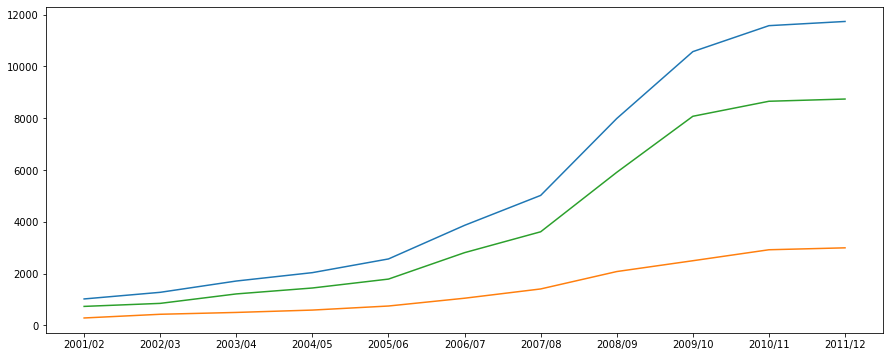

In [12]:
plot(data_gender)

### Read second sheet 7.2 as data_age

In [13]:
# Read 2nd section, by age by skipping first four rows and skipfooter as 14


In [14]:
data_age = x1.parse(u'7.2', skiprows=4, skip_footer=14)
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000/01,1054.0,226.0,45.0,147.0,255.0,214.0,96.0,56.0,14.0,NaN,NaN
2,2001/02,1019.0,237.0,39.0,134.0,240.0,199.0,97.0,48.0,21.0,NaN,NaN
3,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0,NaN,NaN
4,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0,NaN,NaN


### the year column didn’t have a header, which is why pandas names it Unnamed. Let’s rename it

In [15]:
# Rename unames to year

In [16]:
data_age.rename(columns={u'Unnamed: 0':u'Year'},inplace=True)


In [17]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000/01,1054.0,226.0,45.0,147.0,255.0,214.0,96.0,56.0,14.0,NaN,NaN
2,2001/02,1019.0,237.0,39.0,134.0,240.0,199.0,97.0,48.0,21.0,NaN,NaN
3,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0,NaN,NaN
4,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0,NaN,NaN
5,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0,NaN,NaN
6,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0,NaN,NaN
7,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0,NaN,NaN
8,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0,NaN,NaN
9,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0,NaN,NaN


### Drop Unnamed:10 and Unnamed:11 attributes

In [18]:
data_age=data_age.drop(['Unnamed: 10','Unnamed: 11'],axis=1)

### Drop empties and set index as year

In [19]:
data_age.dropna(inplace=True)

### plot all the ages.

In [20]:
data_age.set_index('Year',inplace=True)
print data_age


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(data_age)? (<ipython-input-20-f04e24db4006>, line 2)

### Remove total attribute and Plot

In [ ]:
data_age.drop('Total',axis=1,inplace=True)
data_age.plot()
plt.show()

### Plot under 16 and 25-34 age data

In [ ]:
data_age['Under 16'].plot(label="Under 16")
data_age['25-34'].plot(label="25-34")
plt.legend(loc="upper right")
plt.show()


### This graph shows that obesity in children under 16 is going down whereas adults in the age group 25-34 are balloooning with each passing year

## We would encourage to go through other sheets and find interesting patterns

In [ ]:
pd.read_excels("")